In [396]:
execfile('setting.py')
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:90% !important;}</style>"))


import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [397]:
%matplotlib inline 

In [398]:
def dist(x):
    if x==0:
        return 0
    else: 
        return 1
    

In [399]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

In [328]:
df_raw = pd.read_csv(path1 + "보험2.csv")
df_raw.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,CRDT_LOAN_CNT,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,...,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT
0,1,공무원,5000,7000,4,1,0,0,0,0,...,9001,9001,9001,0,1,0,2,13,3,420001
1,2,자영업,5000,8000,4,2,0,0,0,0,...,24001,0,24001,0,0,0,2,121,0,0
2,3,주부,3000 미만,4000,4,1,0,0,0,0,...,15001,9001,0,3001,1,25,4,121,0,0
3,4,학생,3000 미만,10000,2,1,0,0,0,0,...,6001,3001,0,3001,1,25,4,61,0,0
4,5,공무원,4000,4000,4,1,0,0,0,0,...,21001,15001,21001,0,1,0,1,97,0,0


In [329]:
df_raw['CNTT_LAMT_CNT'].unique()

array([0, 4, 2, 1, 3, 5, 7, 6])

In [330]:
Cancel = []
for i in range(0, df_raw.shape[0]):
    if (df_raw['CNTT_LAMT_CNT'][i]>0) :
        Cancel.append(1)
    else :
        Cancel.append(0)
df_raw['Cancel'] = Cancel

In [375]:
df_raw.columns=['고객_ID', '직업', '추정소득', '가구추정소득', 
                '실가족원수', '보험가입가족원수', '신용대출건수', '**생명신용대출금액', 
                '**생명신용상환금액', '신용대출연체율','30일이내신용대출연체율', '최근1년신용대출연체율',
                '최초신용등급', '최근신용등급', '보험료연체율','최근1년보험료연체율' ,
               '평균약대율', '약관대출가능잔액','최근1년약대금액', '최근1년약대연체율',
                '비연금저축상품월납입보험료','연금저축상품월납입보험료','비가구연금저축상품월납입보험료', 
                '가구비연금저축상품월납입보험료','최대월납입보험료','기납입보험료','가구기납입보험료',
                '실효해지건수','최근1년 실효해지건수','자동이체실패월수','가구총지급보험금액', 
                '가구총보험금청구건수', '가구만기완납경험회수', '나이','생명비신용상환금액', 
                '대출연체여부' , '대출연체여부', '대출정보 현재 총 건수[은행]', '대출정보 현재 총건수[카드사/할부사/캐피탈]',
                '대출정보 현재 총 건수[2산업분류]', '대출정보 현재 총 건수[기타]','대출정보 현재 총 금액','대출정보 현재 총 금액[신용대출]',
                '대출정보 현재 총 금액[은행]','대출정보 현재 총 금액[카드사/할부사/캐피탈]','대출정보 최근 개설일로부터 현재까지 유지기간[신용대출]','대출정보 최근 개설일로부터 현재까지 유지기간[2산업분류-신용대출]',
                '개설정보 현재 신용개설 총 건수[신용카드]', '개설정보 최초 개설일로부터 현재까지 유지기간[신용카드]','보증정보 현재 보증 총 건수','보증정보 현재 보증 총 금액','해지여부']
                

In [376]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.4, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (58837, 52)
test data size : (39225, 52)


In [377]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,고객_ID,실가족원수,보험가입가족원수,신용대출건수,**생명신용대출금액,**생명신용상환금액,신용대출연체율,30일이내신용대출연체율,최근1년신용대출연체율,최초신용등급,...,최근1년보험료연체율_40미만,최근1년보험료연체율_50미만,최근1년보험료연체율_60미만,최근1년보험료연체율_90미만,최근1년보험료연체율_90이상,나이_20대,나이_30대,나이_40대,나이_50대,나이_60대 이상
0,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [378]:
df_raw_dummy.columns

Index(['고객_ID', '실가족원수', '보험가입가족원수', '신용대출건수', '**생명신용대출금액', '**생명신용상환금액',
       '신용대출연체율', '30일이내신용대출연체율', '최근1년신용대출연체율', '최초신용등급', '최근신용등급', '보험료연체율',
       '평균약대율', '약관대출가능잔액', '최근1년약대금액', '최근1년약대연체율', '비연금저축상품월납입보험료',
       '연금저축상품월납입보험료', '비가구연금저축상품월납입보험료', '가구비연금저축상품월납입보험료', '최대월납입보험료',
       '기납입보험료', '가구기납입보험료', '실효해지건수', '최근1년 실효해지건수', '자동이체실패월수', '가구총지급보험금액',
       '가구총보험금청구건수', '가구만기완납경험회수', '생명비신용상환금액', '대출연체여부', '대출연체여부',
       '대출정보 현재 총 건수[은행]', '대출정보 현재 총건수[카드사/할부사/캐피탈]', '대출정보 현재 총 건수[2산업분류]',
       '대출정보 현재 총 건수[기타]', '대출정보 현재 총 금액', '대출정보 현재 총 금액[신용대출]',
       '대출정보 현재 총 금액[은행]', '대출정보 현재 총 금액[카드사/할부사/캐피탈]',
       '대출정보 최근 개설일로부터 현재까지 유지기간[신용대출]',
       '대출정보 최근 개설일로부터 현재까지 유지기간[2산업분류-신용대출]', '개설정보 현재 신용개설 총 건수[신용카드]',
       '개설정보 최초 개설일로부터 현재까지 유지기간[신용카드]', '보증정보 현재 보증 총 건수', '보증정보 현재 보증 총 금액',
       '해지여부', '직업_1차산업 종사자', '직업_2차산업 종사자', '직업_3차산업 종사자', '직업_고소득 전문직',
       '직업_공무원', '직업_기업/단체 임원', '직업_기타', '직업_단순 노무직', '직업_단순 사무직', '직업_사무직',
       '직업_예

In [379]:
# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE

In [380]:
# 목표변수 빈도 확인
print(df_raw.value_counts(["실효해지건수"]),"\n")
print("실효해지건수=0 비율  ", df_raw.value_counts(df_raw["실효해지건수"]==0)/len(df_raw))

실효해지건수
0         89896
1          8166
dtype: int64 

실효해지건수=0 비율   실효해지건수
True     0.916726
False    0.083274
dtype: float64


<Figure size 1000x800 with 0 Axes>

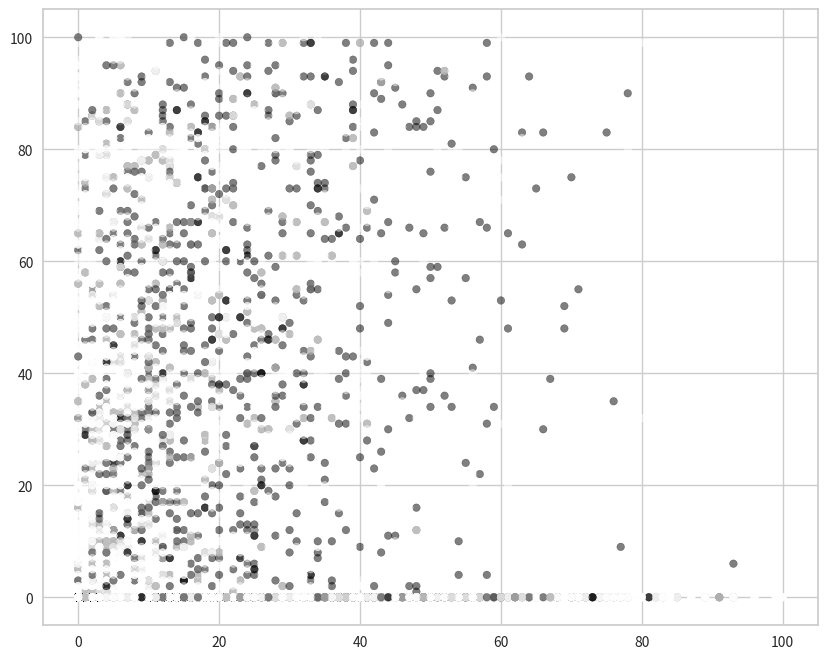

In [381]:
# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_raw['보험료연체율'],df_raw['신용대출연체율'],c=df_raw['실효해지건수'], s=30, alpha=0.5)
plt.show()

In [382]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    53915
1     4922
Name: 해지여부, dtype: int64 

Over-Sampling 후 Train X: (107830, 91)
Over-Sampling 후 Train Y: (107830,) 

Over-Sampling 후 '1':53915
Over-Sampling 후 '0':53915


In [383]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    x_resampled, y_resampled, test_size = 0.4, stratify=y_resampled, random_state = 1234)
print("분할 전 데이터 현황... 설명:", x_resampled.shape, "  목표:", y_resampled.shape)
print("분할 후 설명변수 현황...Train:", df_train_x.shape, " Test:", df_test_x.shape)
print("분할 후 목표변수 현황...Train:", df_train_y.value_counts(), " Test:", df_test_y.value_counts())

분할 전 데이터 현황... 설명: (107830, 91)   목표: (107830,)
분할 후 설명변수 현황...Train: (64698, 91)  Test: (43132, 91)
분할 후 목표변수 현황...Train: 1    32349
0    32349
Name: 해지여부, dtype: int64  Test: 1    21566
0    21566
Name: 해지여부, dtype: int64


   0  1  2  3  4  5  6  7  8  9  ...  82  83  84  85  86  87  88  89  90  해지여부
0  4  2  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   1   0     0
1  5  3  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   1   0   0   0     0
2  3  2  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   1   0     0
3  3  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   1   0   0   0     1
4  2  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   1   0     0

[5 rows x 92 columns]


<Figure size 1000x800 with 0 Axes>

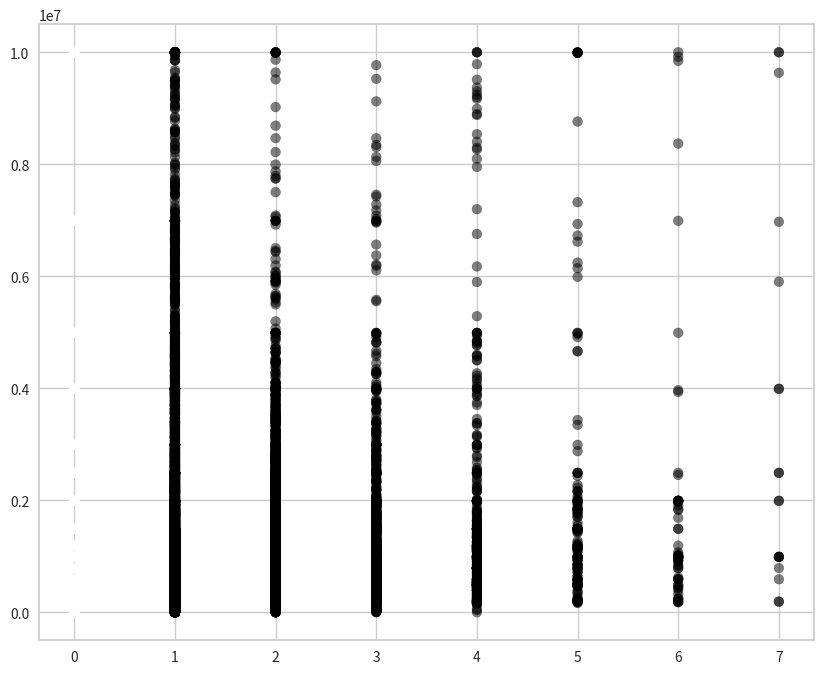

In [384]:
# 데이터 결합 및 산점도 확인
df_resampled = pd.concat([x_resampled,y_resampled], axis=1)
print(df_resampled.head())

# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_resampled[22],df_resampled[19]
            ,c=df_resampled['해지여부'],alpha=0.5)
plt.show()

In [385]:
df_raw["실효해지건수"]=df_raw["실효해지건수"].apply(dist)

In [386]:
len(df_raw.columns)

52

In [387]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop(["실효해지건수","고객_ID","최근1년 실효해지건수"], axis = 1, inplace = False)
df_raw_x.columns=[i for i in range(len(df_raw_x.columns))]
df_raw_y = df_raw_dummy["실효해지건수"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (98062, 91)
분할 후 설명변수 데이터 :Train (58837, 91)   Test (39225, 91)


In [388]:
df_raw_x

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98057,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98058,5,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98059,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98060,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [390]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=df_train_x, label = df_train_y)
dtest = xgb.DMatrix(data=df_test_x, label=df_test_y)


In [391]:
params = {'max_depth' : 2,
         'eta' : 0.05, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 200

In [392]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)


[13:07:03] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.64440	eval-logloss:0.64440
[1]	train-logloss:0.60030	eval-logloss:0.60030
[2]	train-logloss:0.56019	eval-logloss:0.56019
[3]	train-logloss:0.52358	eval-logloss:0.52358
[4]	train-logloss:0.49004	eval-logloss:0.49004
[5]	train-logloss:0.45921	eval-logloss:0.45921
[6]	train-logloss:0.43080	eval-logloss:0.43080
[7]	train-logloss:0.40454	eval-logloss:0.40454
[8]	train-logloss:0.38023	eval-logloss:0.38023
[9]	train-logloss:0.35768	eval-logloss:0.35768
[10]	train-logloss:0.33671	eval-logloss:0.33671
[11]	train-logloss:0.31720	eval-logloss:0.31720
[12]	train-logloss:0.29900	eval-logloss:0.29900
[13]	train-logloss:0.28201	eval-logloss:0.28201
[14]	train-logloss:0.26612	eval-logloss:0.26612
[15]	train-logloss:0.25126	eval-logloss:0.25126
[16]	train-logloss:0.23733	eval-logloss:0.23733
[17]	train-logloss:0.22427	eval-logloss:0.22427
[18]	train-logloss:0.21201	eval-logloss:0.21201
[19]	

[168]	train-logloss:0.00013	eval-logloss:0.00013
[169]	train-logloss:0.00013	eval-logloss:0.00013
[170]	train-logloss:0.00012	eval-logloss:0.00012
[171]	train-logloss:0.00012	eval-logloss:0.00012
[172]	train-logloss:0.00011	eval-logloss:0.00011
[173]	train-logloss:0.00011	eval-logloss:0.00011
[174]	train-logloss:0.00010	eval-logloss:0.00010
[175]	train-logloss:0.00010	eval-logloss:0.00010
[176]	train-logloss:0.00010	eval-logloss:0.00010
[177]	train-logloss:0.00009	eval-logloss:0.00009
[178]	train-logloss:0.00009	eval-logloss:0.00009
[179]	train-logloss:0.00009	eval-logloss:0.00009
[180]	train-logloss:0.00009	eval-logloss:0.00009
[181]	train-logloss:0.00009	eval-logloss:0.00009
[182]	train-logloss:0.00008	eval-logloss:0.00008
[183]	train-logloss:0.00008	eval-logloss:0.00008
[184]	train-logloss:0.00008	eval-logloss:0.00008
[185]	train-logloss:0.00008	eval-logloss:0.00008
[186]	train-logloss:0.00007	eval-logloss:0.00007
[187]	train-logloss:0.00007	eval-logloss:0.00007
[188]	train-logloss:

In [393]:


pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])



predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [394]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [395]:
get_clf_eval(df_test_y, preds)

오차행렬:
 [[35981     0]
 [    0  3244]]

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1: 1.0000
AUC: 1.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

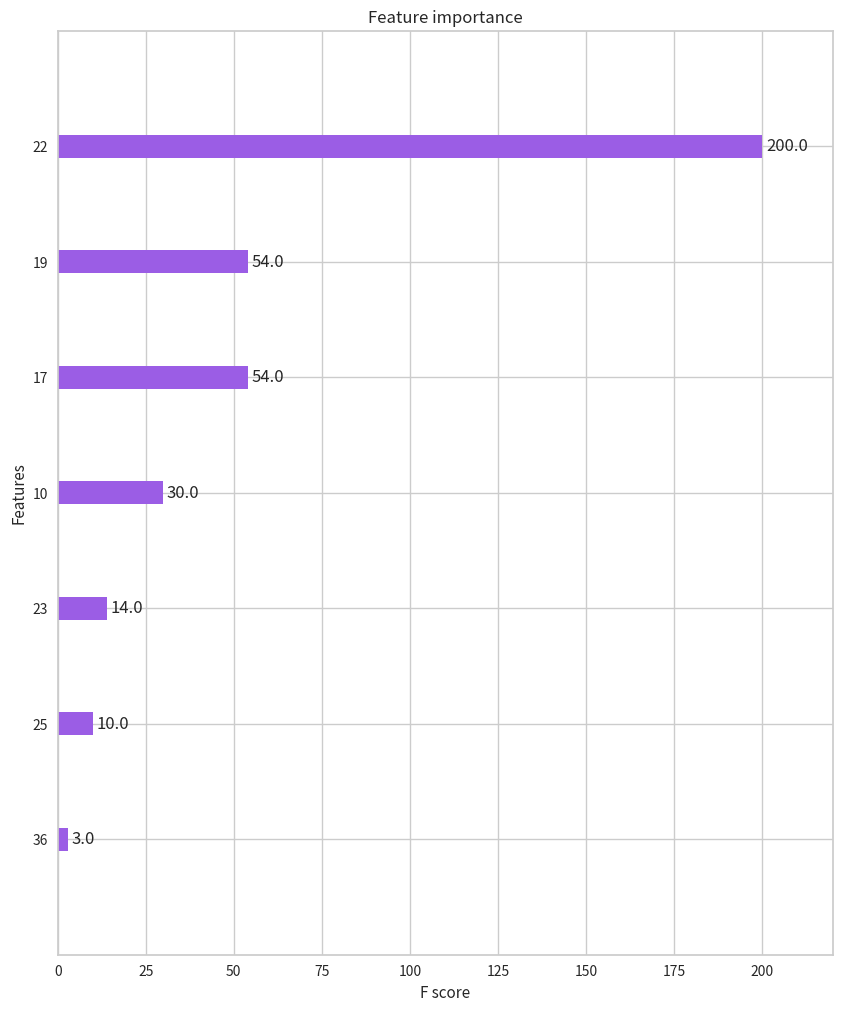

In [354]:


from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)



In [400]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

RandomForestClassifier(random_state=1234)

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [401]:
# 실행옵션 확인
print(rf_uncustomized.get_params().keys())
print(rf_uncustomized.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


In [74]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 1~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

RandomForestClassifier(n_estimators=10, random_state=1234)

RandomForestClassifier(n_estimators=20, random_state=1234)

RandomForestClassifier(n_estimators=30, random_state=1234)

RandomForestClassifier(n_estimators=40, random_state=1234)

RandomForestClassifier(n_estimators=50, random_state=1234)

RandomForestClassifier(n_estimators=60, random_state=1234)

RandomForestClassifier(n_estimators=70, random_state=1234)

RandomForestClassifier(n_estimators=80, random_state=1234)

RandomForestClassifier(n_estimators=90, random_state=1234)

RandomForestClassifier(random_state=1234)

RandomForestClassifier(n_estimators=110, random_state=1234)

RandomForestClassifier(n_estimators=120, random_state=1234)

RandomForestClassifier(n_estimators=130, random_state=1234)

RandomForestClassifier(n_estimators=140, random_state=1234)

RandomForestClassifier(n_estimators=150, random_state=1234)

In [75]:
# 모델 정확도 확인
df_accuracy_n.round(5)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.99940,0.98077
1,20,0.99988,0.98568
2,30,0.99993,0.98714
3,40,0.99998,0.98803
4,50,0.99999,0.98854
5,60,1.00000,0.98889
6,70,1.00000,0.98911
7,80,1.00000,0.98922
8,90,1.00000,0.98929
9,100,1.00000,0.98938


Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'accuracy')

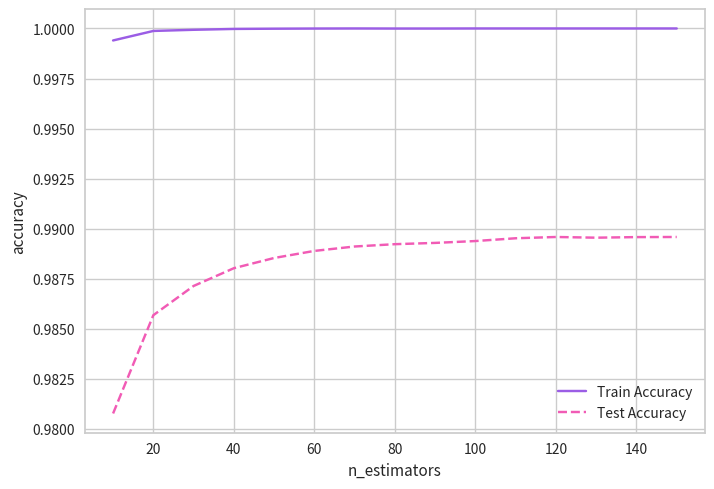

In [76]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()


In [77]:
# 임의로 지정
n_estimators = 60

In [78]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=60, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


RandomForestClassifier(max_depth=1, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=2, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=3, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=4, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=5, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=6, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=7, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=8, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=9, n_estimators=60, random_state=1234)

RandomForestClassifier(max_depth=10, n_estimators=60, random_state=1234)

In [79]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.378,0.379
1,2,0.403,0.403
2,3,0.473,0.474
3,4,0.521,0.521
4,5,0.581,0.580
5,6,0.645,0.642
6,7,0.707,0.703
7,8,0.770,0.764
8,9,0.816,0.809
9,10,0.867,0.856


Text(0.5, 0, 'max depth')

Text(0, 0.5, 'accuracy')

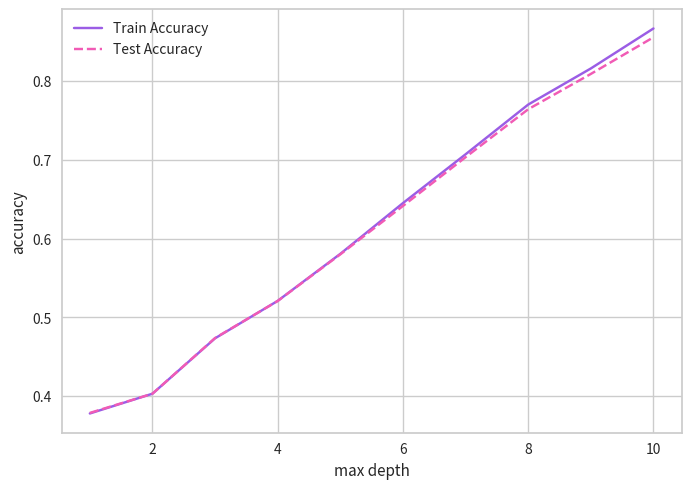

In [80]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

In [81]:
# 최대 깊이 지정
max_depth = 10

In [82]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 10~100
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=10,
                                n_estimators=60, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=20, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=30, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=40, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=50, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=60, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=70, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=80, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=90, n_estimators=60,
                       random_state=1234)

RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=60,
                       random_state=1234)

In [83]:
# 테이블 결과
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.861,0.851
1,20,0.865,0.856
2,30,0.865,0.856
3,40,0.856,0.848
4,50,0.853,0.845
5,60,0.857,0.849
6,70,0.857,0.848
7,80,0.850,0.841
8,90,0.844,0.836
9,100,0.853,0.845


Text(0.5, 0, 'min samples split')

Text(0, 0.5, 'accuracy')

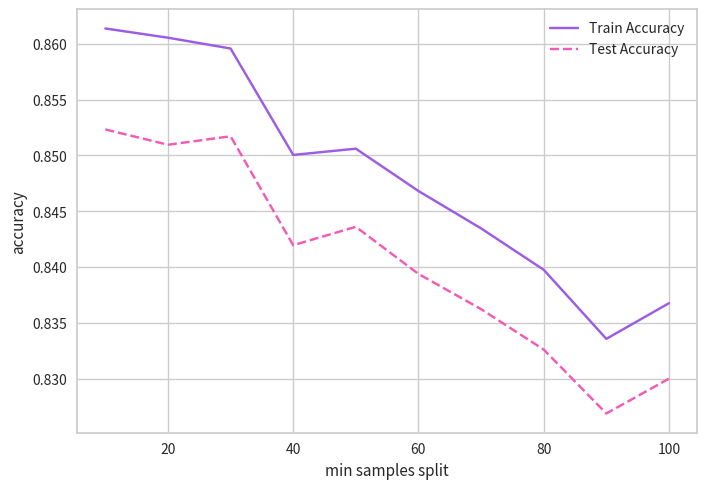

In [91]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [92]:
min_samples_split = 20

In [93]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 20,
                                max_depth=10, n_estimators=60, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                       n_estimators=60, random_state=1234)

KeyboardInterrupt: 

In [ ]:
# 테이블 결과
df_accuracy_leaf.round(3)

In [ ]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

In [88]:
# 임의로 지정
min_samples_leaf = 15

In [89]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=15, max_depth=10, n_estimators=60,
                                  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

RandomForestClassifier(max_depth=10, min_samples_leaf=15, n_estimators=60,
                       random_state=1234)

Accuracy on training set: 0.860
Accuracy on test set: 0.852

Confusion matrix: 
[[19913   742   446   285   101    49    23     7]
 [ 3516 11232  2911  2285   783   541   202    96]
 [ 1393  3175 12920  1994   835   766   369   114]
 [  385  1514   408 18056   353   384   294   172]
 [  102   625   216   114 20259   189    57     4]
 [    3    31    41    27    20 21433    11     0]
 [    0     0     0     0     0     0 21566     0]
 [    0     0     0     0     0     0     0 21566]]
              precision    recall  f1-score   support

           0      0.787     0.923     0.850     21566
           1      0.649     0.521     0.578     21566
           2      0.763     0.599     0.671     21566
           3      0.793     0.837     0.815     21566
           4      0.906     0.939     0.923     21566
           5      0.917     0.994     0.954     21566
           6      0.958     1.000     0.978     21566
           7      0.982     1.000     0.991     21566

    accuracy           